In [12]:
import os             # 운영 체제와 상호 작용하기 위한 모듈
import matplotlib.pyplot as plt     # 데이터 시각화를 위한 Matplotlib의 pyplot 모듈
import pandas as pd                 # 데이터 조작 및 분석을 위한 Pandas 라이브러리
from matplotlib.ticker import MultipleLocator

import csv
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

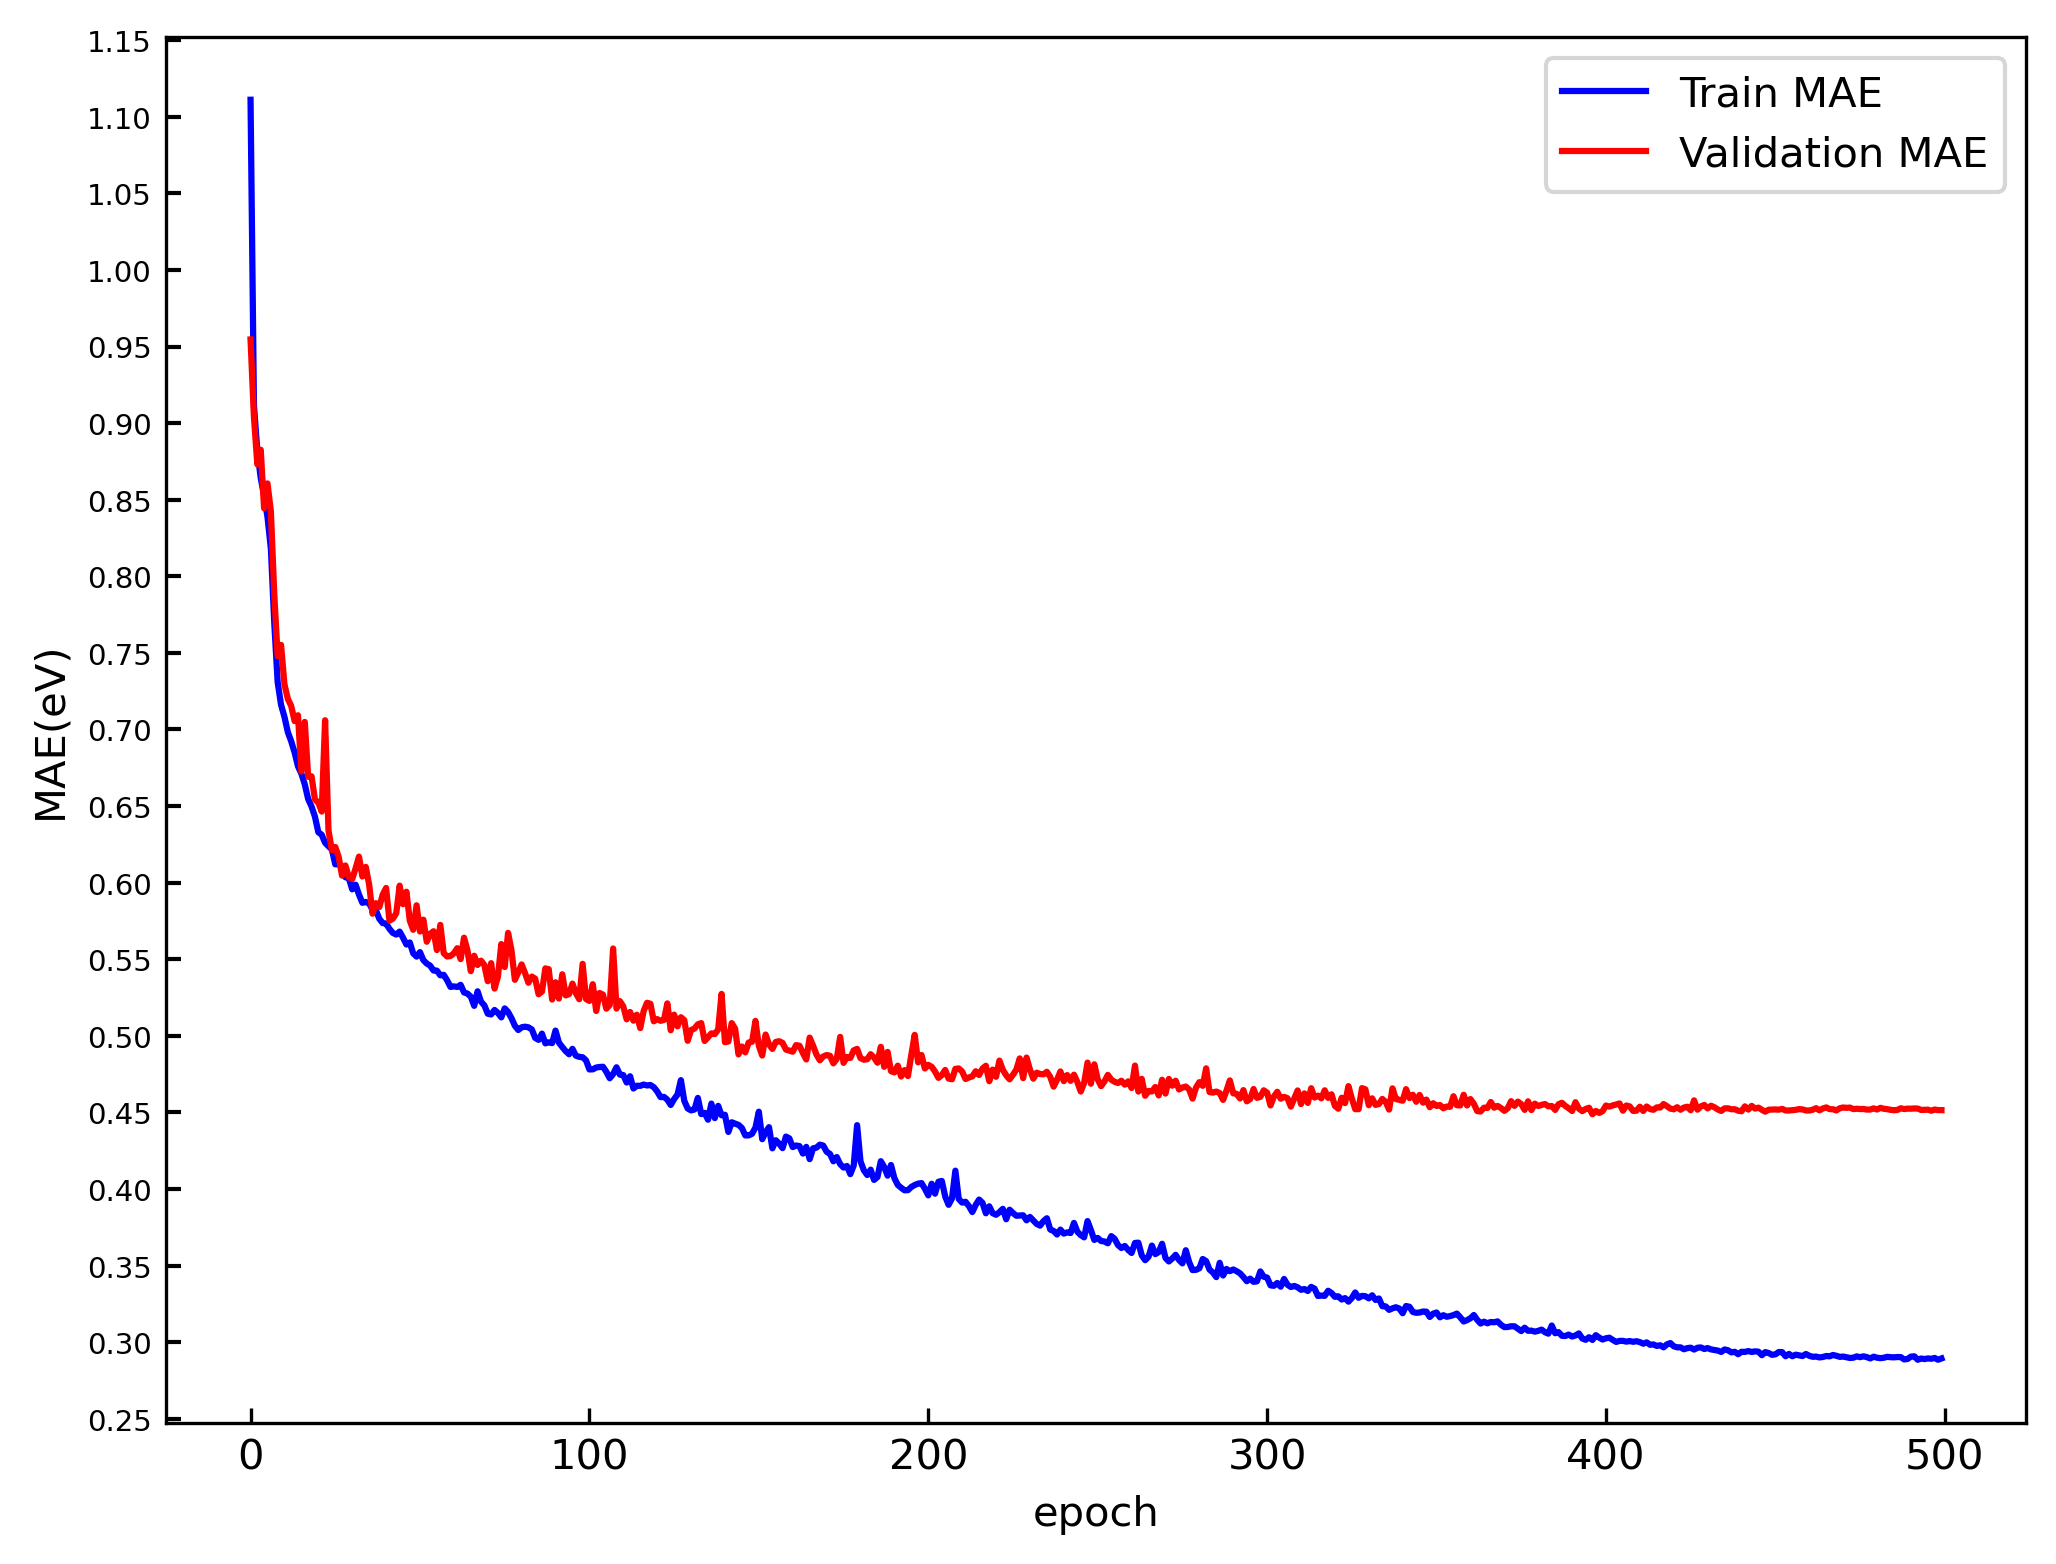

In [2]:


# 그래프 크기와 DPI 설정
plt.figure(figsize=(8, 6), dpi=300)

metrics = pd.read_csv("/home/ljm/matgl_bandgap/Graph_pred/logs/MEGNet_training/version_0/metrics.csv")
metrics = metrics.set_index(metrics.columns[0])

# 시각화
metrics["train_MAE"].dropna().plot(color='blue', label='Train MAE')
metrics["val_MAE"].dropna().plot(color='red', label='Validation MAE')

plt.yticks(fontsize=7)  # 눈금 폰트 크기 설정
plt.gca().tick_params(axis='y', which='major', width=1)  # 주요 눈금 두께 설정

# 주요 눈금 간격 설정
majorLocator = MultipleLocator(0.05)  # 주요 눈금 간격을 0.05로 설정
plt.gca().yaxis.set_major_locator(majorLocator)

# 주요 눈금을 안쪽으로 추가
plt.gca().tick_params(axis='y', direction='in')
plt.gca().tick_params(axis='x', direction='in')

# 세로축 제목 추가
plt.ylabel("MAE(eV)", fontsize=10)  # "Your Y-axis Label"를 원하는 제목으로 바꿔주세요

_ = plt.legend()

# 그래프 저장
plt.savefig('/home/ljm/matgl_bandgap/Last_version/ouput_1.png', dpi=300, bbox_inches='tight')

plt.show()


### R2 graph


Mean Absolute Error (MAE): 0.4577411509675935 ev
5784
5784
[3.25819993019104, 1.0650999546051025, 1.465000033378601, 0.24860000610351562, 0.32600000500679016, 2.704400062561035, 0.7279000282287598, 2.4960999488830566, 2.0332999229431152, 0.11079999804496765, 0.03840000182390213, 1.6461999416351318, 1.7843999862670898, 0.8973000049591064, 0.5909000039100647, 2.5764999389648438, 4.96999979019165, 0.8959000110626221, 6.375100135803223, 2.402100086212158, 0.58160001039505, 1.6569000482559204, 2.7362000942230225, 0.22059999406337738, 0.2662000060081482, 2.988100051879883, 3.9416000843048096, 0.953000009059906, 3.2867000102996826, 0.18219999969005585, 0.10740000009536743, 0.9743000268936157, 0.5996999740600586, 2.5478999614715576, 0.6398000121116638, 2.914400100708008, 0.6019999980926514, 2.2911999225616455, 1.0930999517440796, 3.348599910736084, 3.3531999588012695, 1.7374000549316406, 0.2500999867916107, 2.530100107192993, 0.10899999737739563, 0.1687999963760376, 2.781599998474121, 0.064300

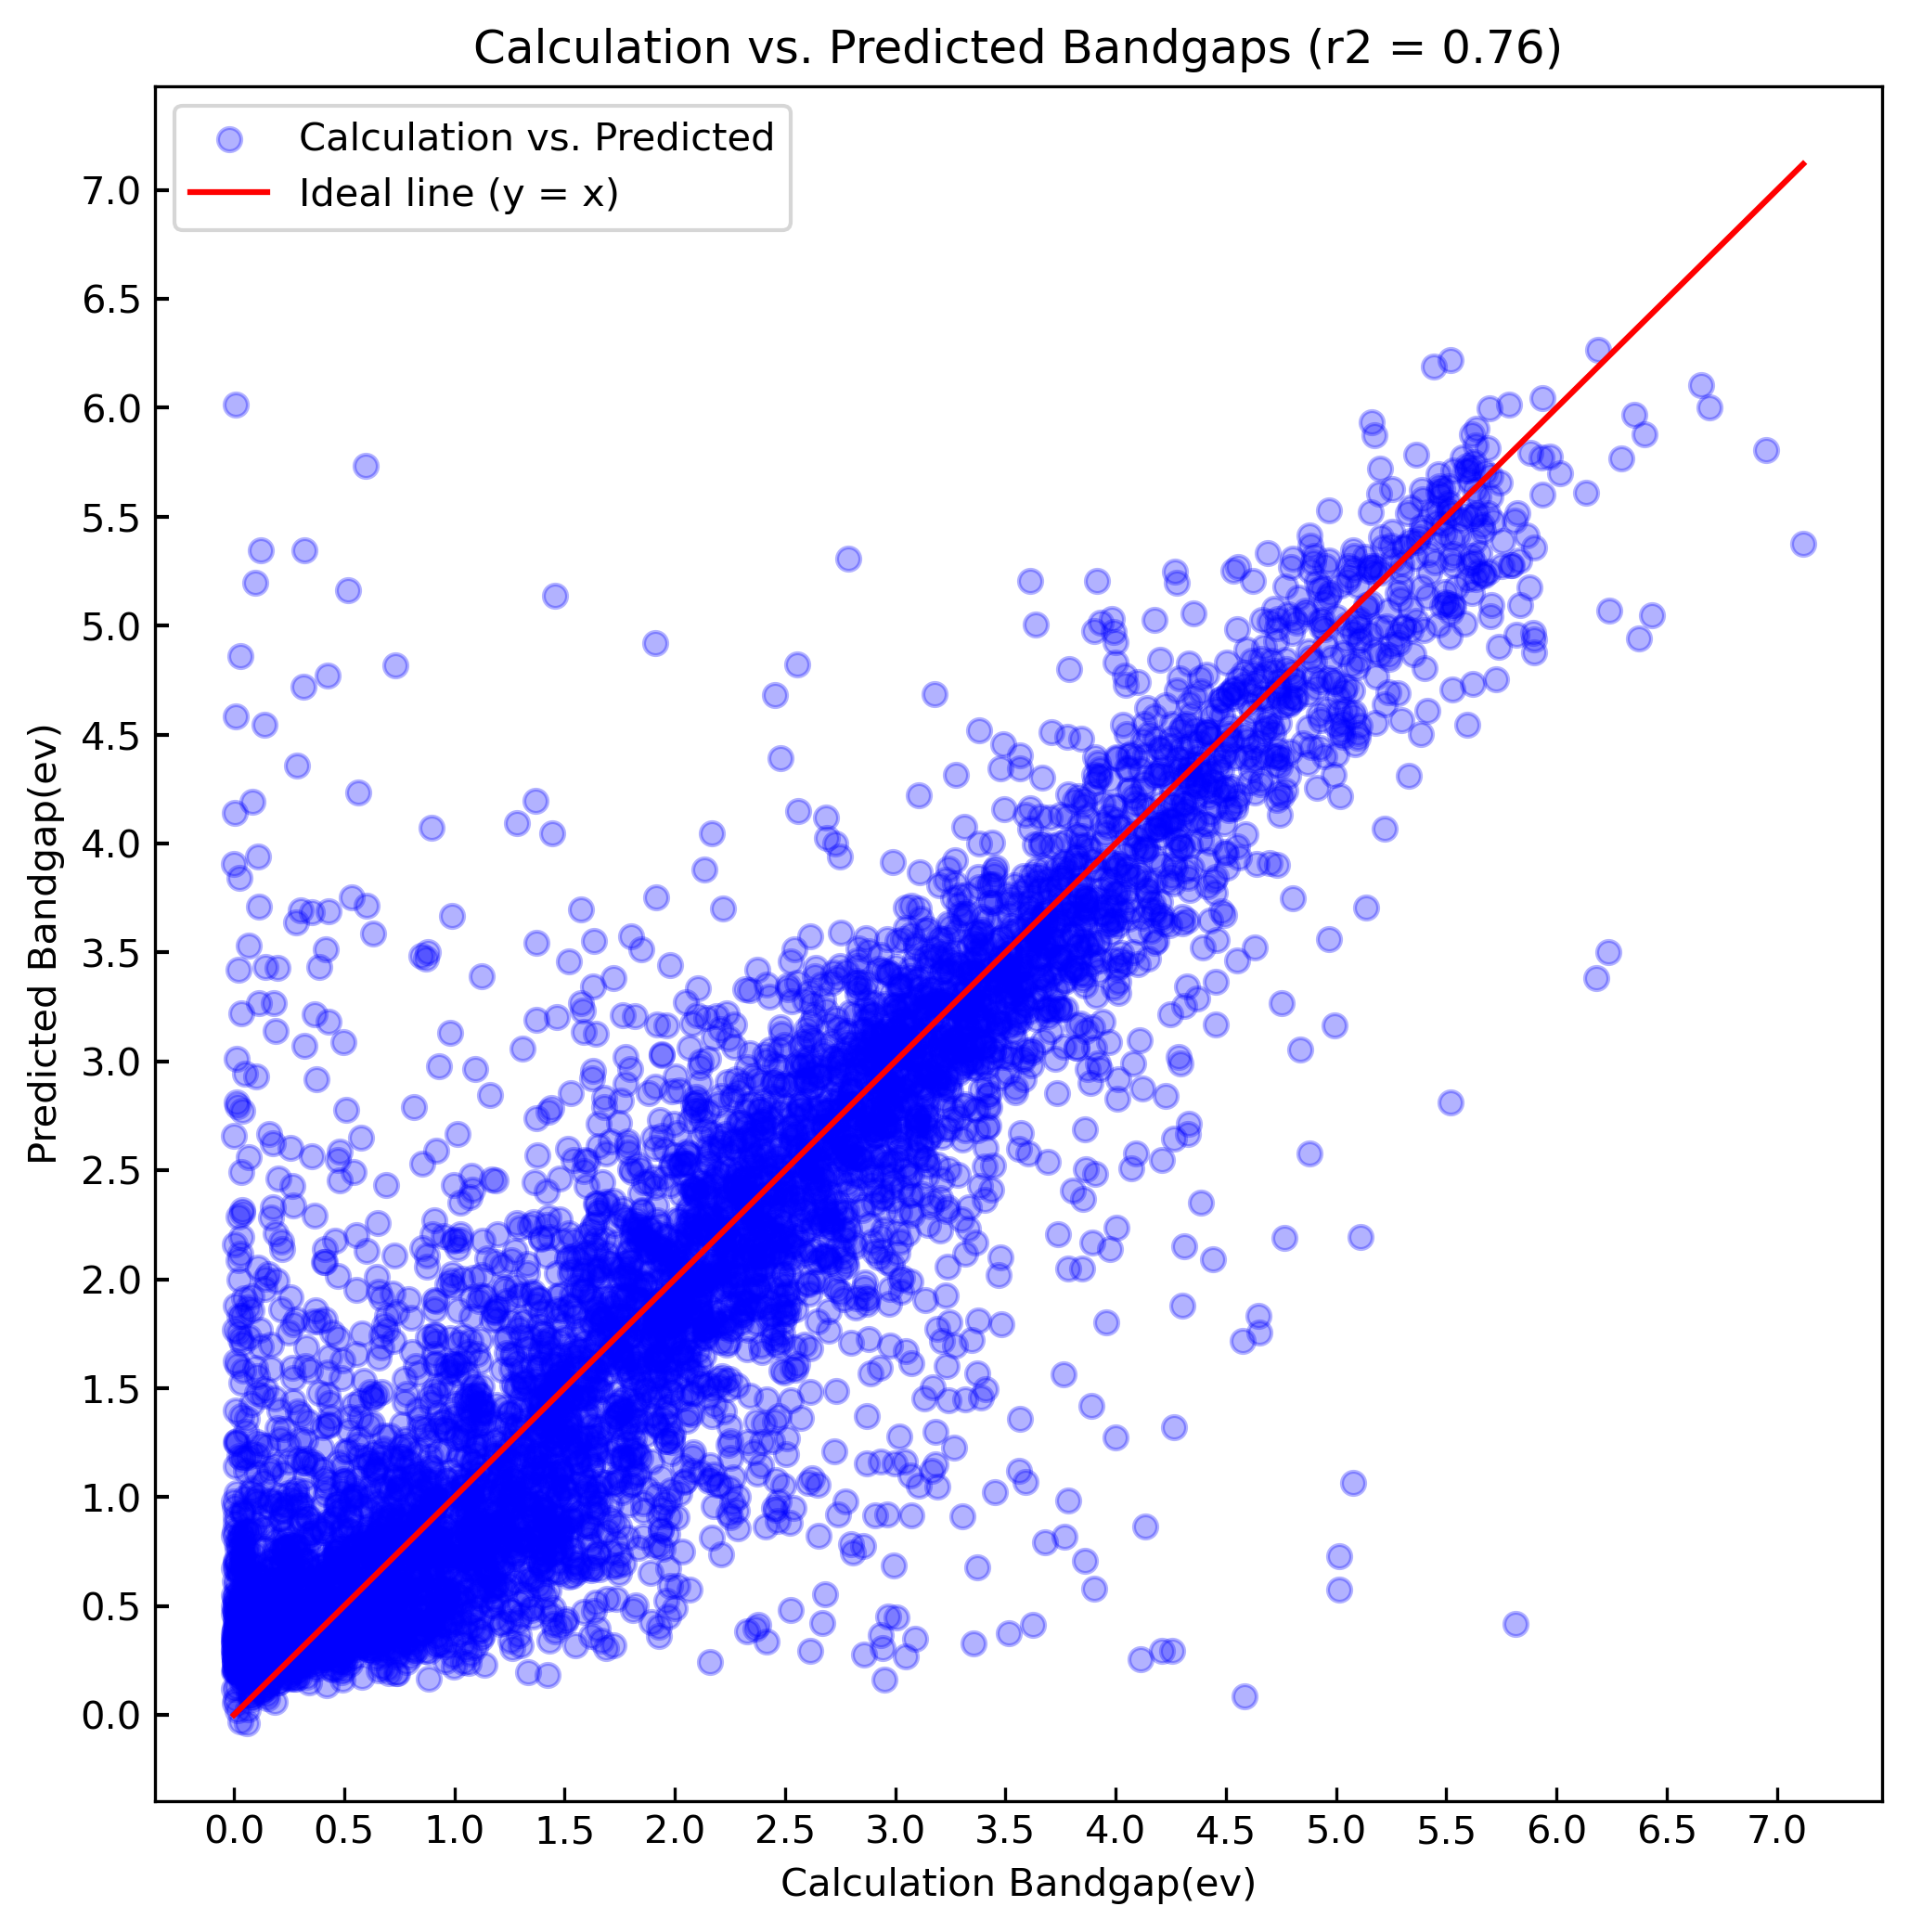

In [16]:

csv_filename = "band_gap_results.csv"

# 실제 및 예측된 밴드 갭 데이터를 저장할 리스트 초기화
calculation_band_gaps = []
predicted_band_gaps = []

# CSV 파일에서 데이터를 읽어옵니다.
with open(csv_filename, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        # 각 행에서 실제 밴드 갭과 예측된 밴드 갭을 추출하고 괄호 제거 후 float로 변환합니다.
        calculation_band_gap_str = row['Calculation Band Gap'].strip('()')
        predicted_band_gap_str = row['Predicted Band Gap'].strip('()')
        
        try:
            calculation_band_gap = float(calculation_band_gap_str)
            predicted_band_gap = float(predicted_band_gap_str)
            
            calculation_band_gaps.append(calculation_band_gap)
            predicted_band_gaps.append(predicted_band_gap)
        except ValueError:
            print("Error: Could not convert string to float.")
            continue

mae = mean_absolute_error(calculation_band_gaps, predicted_band_gaps)
print("Mean Absolute Error (MAE):", mae,"ev")

print(len(calculation_band_gaps))
print(len(predicted_band_gaps))
print(calculation_band_gaps)
print(predicted_band_gaps)
 
# r2 값 계산
r2 = r2_score(calculation_band_gaps,predicted_band_gaps)

# 그래프 그리기
plt.figure(figsize=(8, 8), dpi=300)
plt.scatter(calculation_band_gaps,predicted_band_gaps, color='blue', alpha=0.3, label='Calculation vs. Predicted')
plt.plot([min(calculation_band_gaps), max(calculation_band_gaps)], [min(calculation_band_gaps), max(calculation_band_gaps)], color='red', label='Ideal line (y = x)')

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)# 눈금 폰트 크기 설정
plt.gca().tick_params(axis='y', which='major', width=1)  # 주요 눈금 두께 설정

# 주요 눈금 간격 설정
majorLocator = MultipleLocator(0.5)  # 주요 눈금 간격을 0.05로 설정
plt.gca().yaxis.set_major_locator(majorLocator)
plt.gca().xaxis.set_major_locator(majorLocator)

# 축이름 추가
plt.xlabel('Calculation Bandgap(ev)')
plt.ylabel('Predicted Bandgap(ev)')

# 주요 눈금을 안쪽으로 추가
plt.gca().tick_params(axis='y', direction='in')
plt.gca().tick_params(axis='x', direction='in')

# 그래프 제목
plt.title('Calculation vs. Predicted Bandgaps (r2 = {:.2f})'.format(r2))
plt.legend()
plt.savefig('/home/ljm/matgl_bandgap/Graph_pred/logs/MEGNet_training/version_0/output_r2_graph.png', dpi=300, bbox_inches='tight')


plt.show()


